In [ ]:
Timport re
import requests
from bs4 import BeautifulSoup
from google.colab import drive
drive.mount('/content/gdrive')

URL = 'https://sites.google.com/up.edu.mx/har-up/'
r = requests.get(URL)
soup = BeautifulSoup(r.content,  'lxml')
string = soup.prettify(formatter="minimal")
# regex = r'''div id=&quot;(Subject\d+Activity\d+Trial\d)&lt;/h5&gt;
# &lt;p&gt;
#     &lt;a href=&quot;((?!&quot;&)[\s\S]+)&quot;&gt;Camera1'''
regex = '&lt;h5&gt;(Subject\d+Activity\d+Trial\d)[\s\S]{718}([\s\S]{76})[\s\S]{70}([\s\S]{76})'
match = re.findall(regex, string)
print(len(match), 'matches found')
print('Example match:')
print(match[0])

Mounted at /content/gdrive
561 matches found
Example match:
('Subject1Activity1Trial1', 'https://drive.google.com/a/up.edu.mx/uc?id=1x-gpsGcP1jMAvWAZ9oM1O7MsGW8VaCma', 'https://drive.google.com/a/up.edu.mx/uc?id=1Lh9EMMbDu1Z8yooJVXc4FeAHrOFuR2NL')


In [ ]:
! pip install -U --no-cache-dir gdown --pre

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [ ]:
# from pydrive.drive import GoogleDrive
import shutil
import gdown
import zipfile
import os

down = '/content/downloads/'
if not os.path.exists(down):
     os.makedirs(down, 0o700)

# you may have to download in batches since google drive can freeze downloads after a certain number of downloads
for case in match:
  name = down+case[0]
  for i in range(1,3):
    dir_name = name+f'{i}'
    gdown.download(case[i], dir_name+'.zip', quiet=False)
    zipf = dir_name + '.zip'
    n = case[i] + '&export=donwload'
    # ! gdown --no-cookies $n -O $zipf
    # download_file_from_google_drive((case[i].split('id='))[1], dir_name+'.zip')
    with zipfile.ZipFile(dir_name+'.zip', 'r') as zip_ref:
      os.mkdir(dir_name)
      zip_ref.extractall(dir_name)
    out = down+case[0]+f'Cam{i}'
    # generate video at 18 fps (-r 18) using ffmpeg
    ! ffmpeg -pattern_type glob -i '{dir_name}/*.png' -r 18 $out\.mp4
    # shutil.rmtree(dir_name)
    # os.remove(dir_name+'.zip')


Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1x-gpsGcP1jMAvWAZ9oM1O7MsGW8VaCma
To: /content/downloads/Subject1Activity1Trial11.zip
100%|██████████| 99.7M/99.7M [00:05<00:00, 18.8MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1Lh9EMMbDu1Z8yooJVXc4FeAHrOFuR2NL
To: /content/downloads/Subject1Activity1Trial12.zip
100%|██████████| 94.9M/94.9M [00:02<00:00, 40.6MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1x8CipMrTCQl_Hy5HJpIO7TtmqYg4GC2K
To: /content/downloads/Subject1Activity1Trial21.zip
100%|██████████| 98.4M/98.4M [00:03<00:00, 26.4MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1KnQGzijQbd90cv1s9XA4WEjI6cA_VDpq
To: /content/downloads/Subject1Activity1Trial22.zip
100%|██████████| 93.7M/93.7M [00:02<00:00, 32.9MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1ha60-QTpDIm-TdjLoO6IOFsXoUfwZvyH
To: /content/downloads/Subject1Activity1Trial31.zip
100%|██████████| 99.2M/99.2M [00:02<00:00, 38.1MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1dxzPnB0obEpXqw3wxs44l_aER6vWYc7k
To: /content/downloads/Subject1Activity1Trial32.zip
100%|██████████| 94.2M/94.2M [00:02<00:00, 37.5MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1akgZhuGC9Sh1hq6ExYWQtViVkGUhZYgn
To: /content/downloads/Subject1Activity2Trial11.zip
100%|██████████| 79.7M/79.7M [00:02<00:00, 37.6MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=19NCmkRMTufM-HWtTlKkoSXlk6n5me-Nv
To: /content/downloads/Subject1Activity2Trial12.zip
100%|██████████| 76.6M/76.6M [00:03<00:00, 25.5MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1yeX9yUJ41-hjAjUgEhAdc0UgWqVPYQHN
To: /content/downloads/Subject1Activity2Trial21.zip
100%|██████████| 99.1M/99.1M [00:02<00:00, 37.9MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1C3XTn3kU4T9Ryxsdii0N6WHnbEqS157q
To: /content/downloads/Subject1Activity2Trial22.zip
100%|██████████| 94.9M/94.9M [00:02<00:00, 43.2MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1v-_UcDSeqe9YeAo6-renxCTBIyk9wMuj
To: /content/downloads/Subject1Activity2Trial31.zip
100%|██████████| 98.7M/98.7M [00:03<00:00, 28.7MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1wyKiaO-PKHe7bFrgVgWoACJnZeoolrrz
To: /content/downloads/Subject1Activity2Trial32.zip
100%|██████████| 94.5M/94.5M [00:03<00:00, 31.1MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1ExdMkpxHoK0r1gZHEW_hqR-nTyIIxU1X
To: /content/downloads/Subject1Activity3Trial11.zip
100%|██████████| 97.4M/97.4M [00:03<00:00, 30.8MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1AYMK37Tew9KS3MpKLa3SH-tEToMpw_gV
To: /content/downloads/Subject1Activity3Trial12.zip
100%|██████████| 93.7M/93.7M [00:02<00:00, 35.3MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1JGJFEVVmLK0UgBehH1tyWdGC2UARjRV_
To: /content/downloads/Subject1Activity3Trial21.zip
100%|██████████| 97.1M/97.1M [00:02<00:00, 38.1MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=11h03xDR61RBrsOyD08HYetjMA5DiubKZ
To: /content/downloads/Subject1Activity3Trial22.zip
100%|██████████| 93.1M/93.1M [00:02<00:00, 37.7MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1aRaCcT5sKPQ_nu8Z-YidGvWiJw2fy_Fj
To: /content/downloads/Subject1Activity3Trial31.zip
100%|██████████| 96.3M/96.3M [00:02<00:00, 34.8MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1rYuOKi-pg5czoMe5-LHT3CCcFSdgRZge
To: /content/downloads/Subject1Activity3Trial32.zip
100%|██████████| 92.4M/92.4M [00:03<00:00, 28.0MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1Rtq7JCoKH44eYjuPTAAi4evmwqqAcROG
To: /content/downloads/Subject1Activity4Trial11.zip
100%|██████████| 95.7M/95.7M [00:03<00:00, 30.8MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1CbHWUnv-UtnPTsFb6eugghj61S7Bzar2
To: /content/downloads/Subject1Activity4Trial12.zip
100%|██████████| 92.1M/92.1M [00:03<00:00, 25.6MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1SoBKMbEX-nc1YXLr1Y29l0Q_I4K68Znf
To: /content/downloads/Subject1Activity4Trial21.zip
100%|██████████| 96.8M/96.8M [00:02<00:00, 33.0MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=17vFONFKGLqWlF2Pxa_Pl3J_gWH7YUwtS
To: /content/downloads/Subject1Activity4Trial22.zip
100%|██████████| 93.9M/93.9M [00:02<00:00, 32.1MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=17yfqjawbgsV1pdwZs4006hd7NZ6Yywre
To: /content/downloads/Subject1Activity4Trial31.zip
100%|██████████| 97.7M/97.7M [00:02<00:00, 36.8MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=12kk65WouJRl3UjS9gjTpVY2N3aQyEYvc
To: /content/downloads/Subject1Activity4Trial32.zip
100%|██████████| 94.7M/94.7M [00:02<00:00, 39.8MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1KYWywiXarAvb8_jTti_9BpS04ldKruvz
To: /content/downloads/Subject1Activity5Trial11.zip
100%|██████████| 95.4M/95.4M [00:03<00:00, 28.4MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1MOqkdiqyC60hDOKfuNkVQmTSFKkdyPSl
To: /content/downloads/Subject1Activity5Trial12.zip
100%|██████████| 92.0M/92.0M [00:03<00:00, 30.0MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1l7rn1YS_q695YlYQQwxDJvff1g6bCtBx
To: /content/downloads/Subject1Activity5Trial21.zip
100%|██████████| 92.1M/92.1M [00:02<00:00, 43.6MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1FNbj9cZLGWlrPYrRL1oLSfgW3jHzD7FB
To: /content/downloads/Subject1Activity5Trial22.zip
100%|██████████| 88.9M/88.9M [00:02<00:00, 33.8MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1WT9IHkr-2HLTWnP30U9OpInzfV_2iTbB
To: /content/downloads/Subject1Activity5Trial31.zip
100%|██████████| 94.5M/94.5M [00:03<00:00, 30.1MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From: https://drive.google.com/a/up.edu.mx/uc?id=1bQxIBGlxmJpY0wBHY4Tr-j1j6n8WceYC
To: /content/downloads/Subject1Activity5Trial32.zip
100%|██████████| 91.8M/91.8M [00:02<00:00, 36.5MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Downloading...
From (original): https://drive.google.com/a/up.edu.mx/uc?id=1SD8mIf9-irdJDYlPtAIFEiLqgAAIOSJy
From (redirected): https://drive.google.com/a/up.edu.mx/uc?id=1SD8mIf9-irdJDYlPtAIFEiLqgAAIOSJy&confirm=t&uuid=5b02826c-f855-481a-8110-4fc5e200932c
To: /content/downloads/Subject1Activity6Trial11.zip
100%|██████████| 579M/579M [00:15<00:00, 38.6MB/s]


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/a/up.edu.mx/uc?id=1ea_qn8ZbRwa_rUSXKw1W078PDTjNBUOj

but Gdown can't. Please check connections and permissions.

In [ ]:
# files saved as /content/downloads/Subject1Activity1Trial2Cam1.mp4

In [ ]:
!pip install mediapipe

In [ ]:
import os
vids = [i.split('.')[0] for i in os.listdir('/content/downloads') if i.endswith('.mp4')]

In [ ]:
import cv2
import mediapipe as mp
import pandas as pd

# Load video
for vid_name in vids:
  cap = cv2.VideoCapture(f'/content/downloads/{vid_name}.mp4')

  # Get video properties
  frame_width = int(cap.get(3))
  frame_height = int(cap.get(4))
  fps = int(cap.get(cv2.CAP_PROP_FPS))

  # Initialize MediaPipe Pose model
  mp_pose = mp.solutions.pose
  pose = mp_pose.Pose()

  # Initialize DataFrame to store positions
  # df = pd.DataFrame(columns=['frame', 'shoulder_x', 'shoulder_y', 'belly_x', 'belly_y', 'knee_x', 'knee_y'])

  kps = []

  frame_count = 0
  while cap.isOpened():
      ret, frame = cap.read()

      if not ret:
          break

      # Convert frame to RGB
      rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

      # Detect pose
      results = pose.process(rgb_frame)

      if results.pose_landmarks is not None:
          # Extract key points
          landmarks = results.pose_landmarks.landmark

          # Get coordinates of shoulder, belly, and knees
          lshoulder_x = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x
          lshoulder_y = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y
          lbelly_x = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x
          lbelly_y = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y
          lknee_x = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x
          lknee_y = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y

          rshoulder_x = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x
          rshoulder_y = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y
          rbelly_x = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x
          rbelly_y = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y
          rknee_x = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x
          rknee_y = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y

          # Append data to DataFrame
          kps.append({'frame': frame_count,
                      'lshoulder_x': lshoulder_x,
                      'lshoulder_y': lshoulder_y,
                      'lbelly_x': lbelly_x,
                      'lbelly_y': lbelly_y,
                      'lknee_x': lknee_x,
                      'lknee_y': lknee_y,
                      'rshoulder_x': rshoulder_x,
                      'rshoulder_y': rshoulder_y,
                      'rbelly_x': rbelly_x,
                      'rbelly_y': rbelly_y,
                      'rknee_x': rknee_x,
                      'rknee_y': rknee_y})

          frame_count += 1

  # Release video capture
  cap.release()
  df = pd.DataFrame(kps)

  frames_to_shift = 4
  for shift in range(1, frames_to_shift + 1):
      for col in df.columns:
          if col != 'frame' and not col.endswith("before"):
              new_col_name = f'{col}_diff_{shift}frame_before'
              df[new_col_name] = df[col].diff(shift)
  # Save DataFrame to CSV
  df.to_csv(f'pose_data/pose_data_{vid_name}.csv', index=False)

  rkneesholddiff = (df["rknee_y"] - df["rshoulder_y"]) < 0.02
  lkneesholddiff = (df["lknee_y"] - df["lshoulder_y"]) < 0.02
  shoulderframediff = (df["rshoulder_y_diff_1frame_before"] + \
                      df["rshoulder_y_diff_2frame_before"] + \
                      df["rshoulder_y_diff_3frame_before"] + \
                      df["lshoulder_y_diff_1frame_before"] + \
                      df["lshoulder_y_diff_2frame_before"] + \
                      df["lshoulder_y_diff_3frame_before"]).abs() >= 0.03
  kneeframediff = (df["rknee_y_diff_1frame_before"] + \
                  df["rknee_y_diff_2frame_before"] + \
                  df["rknee_y_diff_3frame_before"] + \
                  df["lknee_y_diff_1frame_before"] + \
                  df["lknee_y_diff_2frame_before"] + \
                  df["lknee_y_diff_3frame_before"]).abs() > 0.01

  bellyframediff = (df["rbelly_y_diff_1frame_before"] + \
                  df["rbelly_y_diff_2frame_before"] + \
                  df["rbelly_y_diff_3frame_before"] + \
                  df["lbelly_y_diff_1frame_before"] + \
                  df["lbelly_y_diff_2frame_before"] + \
                  df["lbelly_y_diff_3frame_before"]).abs() > 0.02


  cond = shoulderframediff & kneeframediff & bellyframediff
  fell = (rkneesholddiff & lkneesholddiff) & (~cond)

  df["label"] = 0
  df.loc[cond,"label"] = 1
  df.loc[fell,"label"] = -1
  df.fillna(0, inplace=True)
  df.to_csv(f"labelled/labelled_{vid_name}.csv")


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.10/dist-packages/google/protobuf/sy

In [ ]:
import shutil
shutil.make_archive('labelled', 'zip', 'labelled')

'/content/labelled.zip'

In [ ]:
# Get video properties
cap = cv2.VideoCapture('/content/downloads/Subject1Activity1Trial1Cam1.mp4')

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Read DataFrame containing positions
df = pd.read_csv('pose_data.csv')

# Initialize VideoWriter object to write output video
out = cv2.VideoWriter('output_video2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# Iterate through each frame
for i in range(len(df)):
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Draw circles around detected points
    lshoulder_x = int(df['lshoulder_x'][i] * frame_width)
    lshoulder_y = int(df['lshoulder_y'][i] * frame_height)
    lbelly_x = int(df['lbelly_x'][i] * frame_width)
    lbelly_y = int(df['lbelly_y'][i] * frame_height)
    lknee_x = int(df['lknee_x'][i] * frame_width)
    lknee_y = int(df['lknee_y'][i] * frame_height)

    rshoulder_x = int(df['rshoulder_x'][i] * frame_width)
    rshoulder_y = int(df['rshoulder_y'][i] * frame_height)
    rbelly_x = int(df['rbelly_x'][i] * frame_width)
    rbelly_y = int(df['rbelly_y'][i] * frame_height)
    rknee_x = int(df['rknee_x'][i] * frame_width)
    rknee_y = int(df['rknee_y'][i] * frame_height)

    cv2.circle(frame, (lshoulder_x, lshoulder_y), 5, (0, 255, 0), -1)
    cv2.circle(frame, (lbelly_x, lbelly_y), 5, (0, 0, 255), -1)
    cv2.circle(frame, (lknee_x, lknee_y), 5, (255, 0, 0), -1)


    cv2.circle(frame, (rshoulder_x, rshoulder_y), 5, (0, 255, 0), -1)
    cv2.circle(frame, (rbelly_x, rbelly_y), 5, (0, 0, 255), -1)
    cv2.circle(frame, (rknee_x, rknee_y), 5, (255, 0, 0), -1)
    # Write frame to output video
    out.write(frame)

# Release video capture and writer
cap.release()
out.release()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('pose_data.csv')

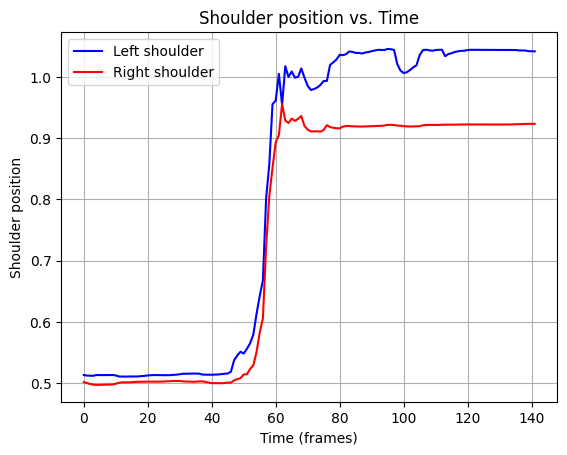

In [ ]:
plt.plot(df['frame'], df['lshoulder_y'],  linestyle='-', color='blue', label='Left shoulder')
plt.plot(df['frame'], df['rshoulder_y'],  linestyle='-', color='red', label='Right shoulder')
plt.xlabel('Time (frames)')
plt.ylabel('Shoulder position')
plt.title('Shoulder position vs. Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
frames_to_shift = 4
for shift in range(1, frames_to_shift + 1):
    for col in df.columns:
        if col != 'frame' and not col.endswith("before"):
            new_col_name = f'{col}_diff_{shift}frame_before'
            df[new_col_name] = df[col].diff(shift)


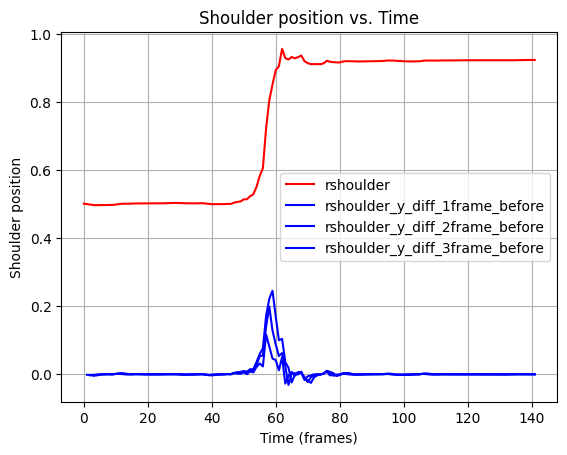

In [ ]:
point="rshoulder"
plt.plot(df['frame'], df[f'{point}_y'],  linestyle='-', color='red', label=f'{point}')
for i in range(1,3+1):
  plt.plot(df['frame'], df[f'{point}_y_diff_{i}frame_before'],  linestyle='-', color='blue', label=f'{point}_y_diff_{i}frame_before')

plt.xlabel('Time (frames)')
plt.ylabel('Shoulder position')
plt.title('Shoulder position vs. Time')
plt.legend()
plt.grid(True)
plt.show()

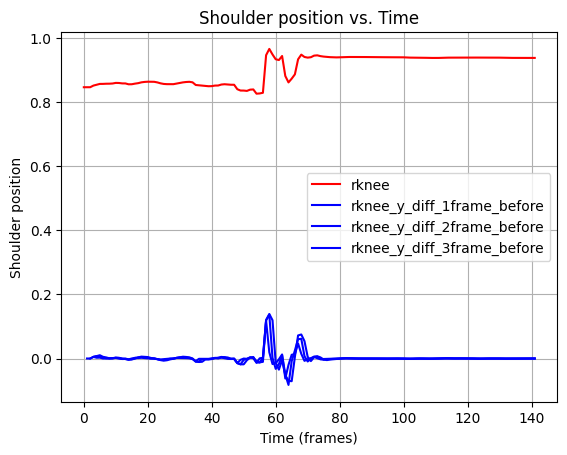

In [ ]:
point="rknee"
plt.plot(df['frame'], df[f'{point}_y'],  linestyle='-', color='red', label=f'{point}')
for i in range(1,3+1):
  plt.plot(df['frame'], df[f'{point}_y_diff_{i}frame_before'],  linestyle='-', color='blue', label=f'{point}_y_diff_{i}frame_before')

plt.xlabel('Time (frames)')
plt.ylabel('Shoulder position')
plt.title('Shoulder position vs. Time')
plt.legend()
plt.grid(True)
plt.show()

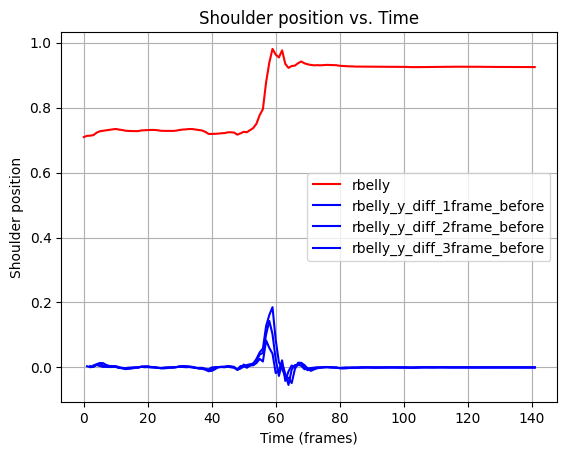

In [ ]:
point="rbelly"
plt.plot(df['frame'], df[f'{point}_y'],  linestyle='-', color='red', label=f'{point}')
for i in range(1,3+1):
  plt.plot(df['frame'], df[f'{point}_y_diff_{i}frame_before'],  linestyle='-', color='blue', label=f'{point}_y_diff_{i}frame_before')

plt.xlabel('Time (frames)')
plt.ylabel('Shoulder position')
plt.title('Shoulder position vs. Time')
plt.legend()
plt.grid(True)
plt.show()

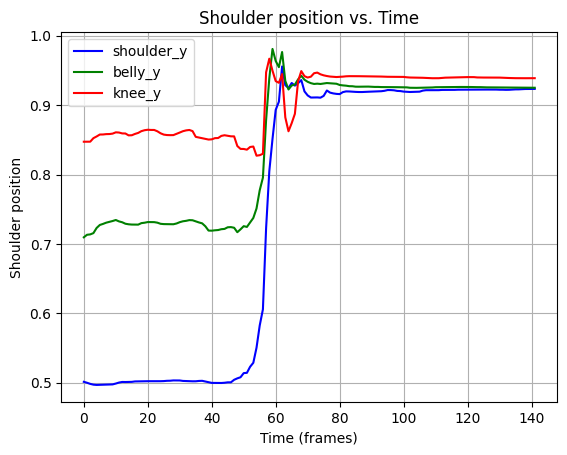

In [ ]:
# plt.plot(df['frame'], df[f'{point}_x'],  linestyle='-', color='red', label=f'{point}')
# for i in range(1,frames_to_shift+1):
#   plt.plot(df['frame'], df[f'{point}_x_diff_{i}frame_before'],  linestyle='-', color='blue', label=f'{point}_x_diff_{i}frame_before')

# plt.plot(df['frame'], df[f'{point}_y'],  linestyle='-', color='red', label=f'{point}')
# for i in range(1,frames_to_shift+1):
#   plt.plot(df['frame'], df[f'{point}_y_diff_{i}frame_before'],  linestyle='-', color='blue', label=f'{point}_y_diff_{i}frame_before')

plt.plot(df['frame'], df[f'rshoulder_y'],  linestyle='-', color='blue', label=f'shoulder_y')
plt.plot(df['frame'], df[f'rbelly_y'],  linestyle='-', color='green', label=f'belly_y')
plt.plot(df['frame'], df[f'rknee_y'],  linestyle='-', color='red', label=f'knee_y')


plt.xlabel('Time (frames)')
plt.ylabel('Shoulder position')
plt.title('Shoulder position vs. Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
(df["rshoulder_y_diff_1frame_before"] + \
                    df["rshoulder_y_diff_2frame_before"] + \
                    df["rshoulder_y_diff_3frame_before"] + \
                    df["lshoulder_y_diff_1frame_before"] + \
                    df["lshoulder_y_diff_2frame_before"] + \
                    df["lshoulder_y_diff_3frame_before"]).abs()[40:90]

40    0.006140
41    0.002039
42    0.000099
43    0.002203
44    0.003613
45    0.005659
46    0.011681
47    0.074260
48    0.077336
49    0.065124
50    0.034122
51    0.038270
52    0.072760
53    0.102978
54    0.223646
55    0.314197
56    0.325090
57    0.910731
58    0.964801
59    0.960764
60    0.570466
61    0.406560
62    0.158987
63    0.164305
64    0.007607
65    0.041653
66    0.030893
67    0.002484
68    0.050614
69    0.052791
70    0.102116
71    0.099091
72    0.033646
73    0.001258
74    0.018389
75    0.037255
76    0.045069
77    0.094078
78    0.062885
79    0.041605
80    0.032821
81    0.025494
82    0.019766
83    0.020933
84    0.008186
85    0.003520
86    0.005346
87    0.005479
88    0.003457
89    0.005560
dtype: float64

In [ ]:
(df["rknee_y_diff_1frame_before"] + \
                df["rknee_y_diff_2frame_before"] + \
                df["rknee_y_diff_3frame_before"] + \
                df["lknee_y_diff_1frame_before"] + \
                df["lknee_y_diff_2frame_before"] + \
                df["lknee_y_diff_3frame_before"]).abs()[40:90]

40    0.007140
41    0.002990
42    0.004461
43    0.006651
44    0.016286
45    0.025699
46    0.024204
47    0.003673
48    0.058275
49    0.048315
50    0.024071
51    0.001004
52    0.027940
53    0.077541
54    0.088058
55    0.133264
56    0.078323
57    0.516791
58    0.483892
59    0.088305
60    0.150659
61    0.140159
62    0.111780
63    0.232381
64    0.175665
65    0.017083
66    0.087067
67    0.344750
68    0.279697
69    0.081974
70    0.029943
71    0.039136
72    0.008104
73    0.006679
74    0.010699
75    0.015681
76    0.015707
77    0.001096
78    0.000914
79    0.002586
80    0.002016
81    0.002549
82    0.002255
83    0.000815
84    0.000217
85    0.000462
86    0.000640
87    0.001083
88    0.007398
89    0.003085
dtype: float64

In [ ]:
(df["rbelly_y_diff_1frame_before"] + \
                df["rbelly_y_diff_2frame_before"] + \
                df["rbelly_y_diff_3frame_before"] + \
                df["lbelly_y_diff_1frame_before"] + \
                df["lbelly_y_diff_2frame_before"] + \
                df["lbelly_y_diff_3frame_before"]).abs() [45:90]

45    0.009438
46    0.027429
47    0.046917
48    0.012493
49    0.034852
50    0.036517
51    0.044184
52    0.062131
53    0.091304
54    0.152754
55    0.239088
56    0.251387
57    0.633646
58    0.660005
59    0.616482
60    0.183838
61    0.011079
62    0.063862
63    0.080208
64    0.110571
65    0.049278
66    0.003986
67    0.053715
68    0.049232
69    0.004830
70    0.034350
71    0.044535
72    0.025665
73    0.012855
74    0.002310
75    0.009891
76    0.006450
77    0.008470
78    0.002814
79    0.000446
80    0.000260
81    0.001239
82    0.000798
83    0.002808
84    0.003082
85    0.000534
86    0.001209
87    0.001679
88    0.002515
89    0.002881
dtype: float64

In [ ]:
rkneesholddiff = (df["rknee_y"] - df["rshoulder_y"]) < 0.02
lkneesholddiff = (df["lknee_y"] - df["lshoulder_y"]) < 0.02
shoulderframediff = (df["rshoulder_y_diff_1frame_before"] + \
                    df["rshoulder_y_diff_2frame_before"] + \
                    df["rshoulder_y_diff_3frame_before"] + \
                    df["lshoulder_y_diff_1frame_before"] + \
                    df["lshoulder_y_diff_2frame_before"] + \
                    df["lshoulder_y_diff_3frame_before"]).abs() >= 0.03
kneeframediff = (df["rknee_y_diff_1frame_before"] + \
                df["rknee_y_diff_2frame_before"] + \
                df["rknee_y_diff_3frame_before"] + \
                df["lknee_y_diff_1frame_before"] + \
                df["lknee_y_diff_2frame_before"] + \
                df["lknee_y_diff_3frame_before"]).abs() > 0.01

bellyframediff = (df["rbelly_y_diff_1frame_before"] + \
                df["rbelly_y_diff_2frame_before"] + \
                df["rbelly_y_diff_3frame_before"] + \
                df["lbelly_y_diff_1frame_before"] + \
                df["lbelly_y_diff_2frame_before"] + \
                df["lbelly_y_diff_3frame_before"]).abs() > 0.02


cond = shoulderframediff & kneeframediff & bellyframediff
fell = (rkneesholddiff & lkneesholddiff) & (~cond)

In [ ]:
df["label"] = 0

In [ ]:
fell[40:100]

40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64     True
65    False
66     True
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
90    False
91    False
92    False
93    False
94    False
95     True
96     True
97     True
98    False
99    False
dtype: bool

In [ ]:
df.loc[cond,"label"] = 1
df.loc[fell,"label"] = -1

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df

,frame,lshoulder_x,lshoulder_y,lbelly_x,lbelly_y,lknee_x,lknee_y,rshoulder_x,rshoulder_y,rbelly_x,...,lbelly_y_diff_4frame_before,lknee_x_diff_4frame_before,lknee_y_diff_4frame_before,rshoulder_x_diff_4frame_before,rshoulder_y_diff_4frame_before,rbelly_x_diff_4frame_before,rbelly_y_diff_4frame_before,rknee_x_diff_4frame_before,rknee_y_diff_4frame_before,label
0,0,0.737450,0.513004,0.738106,0.714465,0.725872,0.860380,0.680268,0.501332,0.701034,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1,0.737283,0.512185,0.732770,0.715700,0.725875,0.866141,0.680616,0.499996,0.693354,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,2,0.737133,0.511901,0.730531,0.716899,0.725713,0.870327,0.681036,0.498395,0.690454,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,3,0.735977,0.511918,0.723241,0.720142,0.725692,0.873025,0.683457,0.497275,0.688334,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.734694,0.513124,0.720563,0.728826,0.725740,0.878899,0.685403,0.496888,0.685014,...,0.014361,-0.000132,0.018520,0.005135,-0.004444,-0.016020,0.013448,-0.008523,0.007578,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,137,0.189336,1.043189,0.357670,0.992263,0.481167,1.010225,0.199657,0.923004,0.364405,...,-0.000714,-0.000805,-0.000034,0.000078,0.000828,-0.000263,-0.000250,0.000274,-0.000310,-1
138,138,0.189303,1.043181,0.357669,0.992096,0.481109,1.010184,0.199716,0.923285,0.364384,...,-0.000869,-0.000168,-0.000008,0.000115,0.000848,-0.000221,-0.000275,0.000216,-0.000152,-1
139,139,0.189141,1.042130,0.357668,0.991564,0.481127,1.010213,0.199792,0.923286,0.364371,...,-0.001335,0.000227,0.000115,0.000164,0.000535,-0.000166,-0.000376,0.000014,-0.000038,-1
140,140,0.189075,1.041904,0.357547,0.991550,0.480903,1.010570,0.199824,0.923287,0.364351,...,-0.001173,0.000060,0.000201,0.000169,0.000511,-0.000078,-0.000201,-0.000034,0.000026,-1


In [ ]:
df.to_csv("labelled_Subject1Activity1Trial1Cam1.csv")